# Importamos Librerias

In [ ]:
#from keras.datasets import imdb as dataset
from keras.datasets import reuters as dataset
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargamos y analizamos el dataset

In [ ]:
# Primer hyperparámetro
num_words=30000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Number of unique words: 30000


In [ ]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 145.96419665122906
Standard Deviation: 146


# Impresión de comentario preprocesado con su etiqueta

In [ ]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
i = 0
print("Label:", targets[i])
# Las comentarios ya están preprocesados
print(data[i])

Label: 3
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

565248/550378 [==============================] - 0s 0us/step
['mdbl:10996', 'fawc:16260', 'degussa:12089', 'woods:8803', 'hanging:13796', 'localized:20672', 'sation:20673', 'chanthaburi:20675', 'refunding:10997', 'hermann:8804', 'passsengers:20676', 'stipulate:20677', 'heublein:8352', 'screaming:20713', 'tcby:16261', 'four:185', 'grains:1642', 'broiler:20680', 'wooden:12090', 'wednesday:1220', 'highveld:13797', 'duffour:7593', '0053:20681', 'elections:3914', '270:2563', '271:3551', '272:5113', '273:3552', '274:3400', 'rudman:7975', '276:3401', '277:3478', '278:3632', '279:4309', 'dormancy:9381', 'errors:7247', 'deferred:3086', 'sptnd:20683', 'cooking:8805', 'stratabit:20684', 'designing:16262', 'metalurgicos:20685', 'databank:13798', '300er:20686', 'shocks:20687', 'nawg:7972', 'tnta:20688', 'perforations:20689', 'affiliates:2891', '27p:20690', 'ching:16263', 'china:595', 'wagyu:16264', 'affiliated:3189', 'chino:16265', 'chinh:16266', 'slickline:20692', 'doldrums:13799', 'kids:12092', '

In [ ]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['10996:mdbl', '16260:fawc', '12089:degussa', '8803:woods', '13796:hanging', '20672:localized', '20673:sation', '20675:chanthaburi', '10997:refunding', '8804:hermann', '20676:passsengers', '20677:stipulate', '8352:heublein', '20713:screaming', '16261:tcby', '185:four', '1642:grains', '20680:broiler', '12090:wooden', '1220:wednesday', '13797:highveld', '7593:duffour', '20681:0053', '3914:elections', '2563:270', '3551:271', '5113:272', '3552:273', '3400:274', '7975:rudman', '3401:276', '3478:277', '3632:278', '4309:279', '9381:dormancy', '7247:errors', '3086:deferred', '20683:sptnd', '8805:cooking', '20684:stratabit', '16262:designing', '20685:metalurgicos', '13798:databank', '20686:300er', '20687:shocks', '7972:nawg', '20688:tnta', '20689:perforations', '2891:affiliates', '20690:27p', '16263:ching', '595:china', '16264:wagyu', '3189:affiliated', '16265:chino', '16266:chinh', '20692:slickline', '13799:doldrums', '12092:kids', '3028:climbed', '6693:controversy', '20693:kidd', '12093:spott

In [ ]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[1]] )
print(data[1])
print()
print(decoded)

[1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]

# generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo # turnover in 1986 was 17 5 billion belgian francs reuter 3


In [ ]:
#Observamos el largo de cada artículo 
lengths= [ len(article) for article in data ]
print(lengths)

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64, 409, 92, 319, 166, 85, 200, 152, 474, 60, 58, 584, 71, 273, 51, 255, 28, 171, 143, 91, 46, 110, 77, 162, 24, 52, 175, 61, 95, 97, 259, 112, 73, 94, 17, 650, 23, 88, 309, 105, 89, 41, 314, 54, 374, 67, 160, 75, 207, 373, 84, 87, 74, 98, 136, 256, 95, 50, 108, 52, 100, 233, 86, 68, 47, 73, 158, 113, 23, 100, 80, 202, 104, 122, 101, 95, 118, 253, 192, 80, 183, 29, 604, 41, 103, 63, 147, 472, 58, 23, 37, 98, 73, 122, 812, 51, 179, 56, 60, 60, 25, 212, 34, 406, 122, 27, 86, 83, 43, 208, 26, 159, 65, 48, 335, 701, 314, 333, 68, 263, 124, 337, 180, 67

# Graficamos el dataset

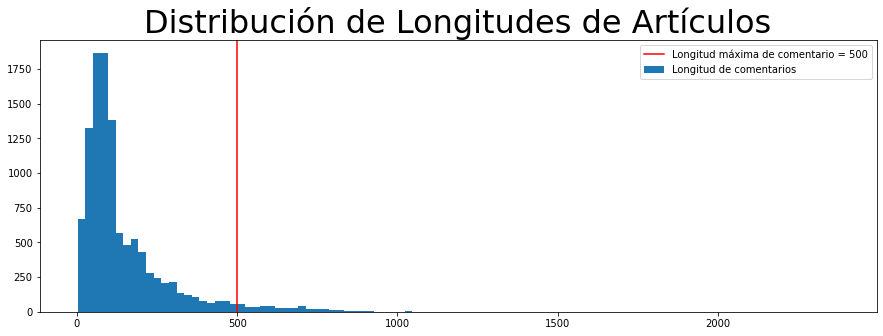

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(lengths,bins=100,label="Longitud de comentarios")
plt.title(label="Distribución de Longitudes de Artículos", fontsize="32",loc="center")
#plt.plot([500,500],[0,1750])
plt.axvline(x=500, label='Longitud máxima de comentario = {}'.format(500), c="r")
plt.legend( loc="upper right")
plt.show()

# Padding y formateo de data para entrenar

In [ ]:
# Hyperparametro - Longitud máxima de comentario
maxlen=500

In [ ]:
data = pad_sequences(data,maxlen=maxlen) # trunca si data es mayor a maxlen y te completa con 0 si data es menor a maxlen

In [ ]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

500
0.0


In [ ]:
data=np.array(data)

In [ ]:
data.shape

(11228, 500)

# Armar una MLP con one-hot encoding para resolver el problema

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
print(num_categories,maxlen,num_words)


46 500 30000


In [ ]:
# usar maxlen y num_words para calcular la entrada
# Utilizar una sola capa
model = Sequential()
## TODO
salida_densa = num_categories
input_shape = [maxlen*num_words]
model.add(Dense(salida_densa, input_shape=input_shape, activation='softmax'))

In [3]:
# model.summary()

In [ ]:
# # Utilizar una sola capa # Otra forma que lo resuelve Carlos
# model = Sequential()
# ## TODO
# salida_densa = num_categories   #46 por que la cantidad de clases va de 0 a 45
# input_shape = [maxlen*num_words]
# model.add(Dense(salida_densa, input_shape=input_shape, activation='softmax'))
# model.summary() 
# #Para resolverlo utilizando una sola capa, hay que multiplicar 500*30000, lo que hace un costo computacional imposible
# #por eso se utiliza embedding, si esta celda la corro, va a tirar error...

## ¿Por que no es viable esta red?

Esta red no es viable por el costo computacional que representa al tener que multiplicar: ``[maxlen * num_words] `` = **_500*30000_**, por esta razón es mas eficiente utilizar embeddings.

# Armar una MLP usando Embeddings

In [ ]:
from keras.layers import Embedding, Flatten, Dropout
from keras import optimizers

In [ ]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = num_categories #46
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           960096    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dropout (Dropout)           (None, 16000)             0         
                                                                 
 dense_1 (Dense)             (None, 46)                736046    
                                                                 
Total params: 1,696,142
Trainable params: 1,696,142
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Embedding, Flatten, Dropout
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#sparce_x_entropy xq tenemos el numero de indice a la salida

In [ ]:
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
281/281 [==============================] - 5s 9ms/step - loss: 2.0303 - accuracy: 0.4810 - val_loss: 1.7003 - val_accuracy: 0.5752
Epoch 2/5
281/281 [==============================] - 3s 9ms/step - loss: 1.3026 - accuracy: 0.6840 - val_loss: 1.4055 - val_accuracy: 0.6772
Epoch 3/5
281/281 [==============================] - 3s 9ms/step - loss: 0.7697 - accuracy: 0.8263 - val_loss: 1.2830 - val_accuracy: 0.6919
Epoch 4/5
281/281 [==============================] - 2s 9ms/step - loss: 0.4781 - accuracy: 0.9012 - val_loss: 1.2625 - val_accuracy: 0.7026
Epoch 5/5
281/281 [==============================] - 2s 8ms/step - loss: 0.3364 - accuracy: 0.9329 - val_loss: 1.2839 - val_accuracy: 0.7066


In [ ]:
#obtenemos los pesos de la capa de embedding
model.layers[0].get_weights()

[array([[-0.00487926, -0.0183835 , -0.01638484, ...,  0.0139459 ,
         -0.00141565,  0.00143356],
        [ 0.0423679 ,  0.1165991 ,  0.1992859 , ..., -0.45490414,
         -0.12889701, -0.2421829 ],
        [-0.03029425,  0.01256206,  0.14489406, ..., -0.07387802,
          0.03014899, -0.04574749],
        ...,
        [-0.09453525,  0.04493113,  0.01655172, ...,  0.06138303,
          0.01276216,  0.035662  ],
        [-0.020968  ,  0.0160571 ,  0.01582546, ..., -0.00244163,
         -0.05274817, -0.04731117],
        [-0.04764657,  0.03267107, -0.04935756, ..., -0.02851982,
          0.02284205, -0.04380869]], dtype=float32)]

In [ ]:
#observamos el shape que tiene
model.layers[0].get_weights()[0].shape

(30003, 32)

In [ ]:
#podemos investigar las primeras 1000 palabras
words = model.layers[0].get_weights()[0][:1000]
print(words)

[[-0.00487926 -0.0183835  -0.01638484 ...  0.0139459  -0.00141565
   0.00143356]
 [ 0.0423679   0.1165991   0.1992859  ... -0.45490414 -0.12889701
  -0.2421829 ]
 [-0.03029425  0.01256206  0.14489406 ... -0.07387802  0.03014899
  -0.04574749]
 ...
 [-0.14321479 -0.00102232 -0.07623611 ... -0.02166613 -0.00542929
  -0.14807181]
 [ 0.06064798  0.01475274  0.12615806 ...  0.01745469  0.05131768
  -0.01106149]
 [ 0.10238504  0.0335026   0.02736275 ... -0.09980081  0.06941018
   0.00133216]]


Text(0.04910339, -0.0275839, 'good')

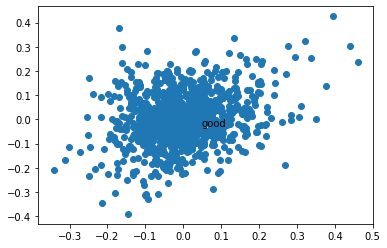

In [ ]:
#investigamos un poco los pesos
plt.scatter(words[:,0],words[:,1])
plt.text(words[index['good'],0],words[index['good'],1], s='good')

# Armar una CNN
Abajo hay un ejemplo de arquitectura

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding_12 (Embedding)     (None, 1000, 32)          960096    
# _________________________________________________________________
# conv1d_7 (Conv1D)            (None, 1000, 64)          14400     
# _________________________________________________________________
# max_pooling1d_4 (MaxPooling1 (None, 500, 64)           0         
# _________________________________________________________________
# conv1d_8 (Conv1D)            (None, 500, 128)          57472     
# _________________________________________________________________
# global_max_pooling1d_4 (Glob (None, 128)               0         
# _________________________________________________________________
# dropout_4 (Dropout)          (None, 128)               0         
# _________________________________________________________________
# dense_19 (Dense)             (None, 46)                5934      
# =================================================================

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense

In [ ]:
num_words= 30000
nb_words=num_words+3
embed_dim=32
maxlen=500
num_filters=64

model = Sequential()                                                               #Layer (type) 
model.add(Embedding(nb_words, embed_dim, input_length= maxlen, trainable=True))    #embedding_12 (Embedding) 
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))               #conv1d_7 (Conv1D)
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters*2, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           960096    
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           14400     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 250, 128)          57472     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [ ]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(data,targets,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
281/281 [==============================] - 12s 15ms/step - loss: 2.0996 - accuracy: 0.4713 - val_loss: 1.6825 - val_accuracy: 0.5534
Epoch 2/10
281/281 [==============================] - 4s 14ms/step - loss: 1.5830 - accuracy: 0.5964 - val_loss: 1.5161 - val_accuracy: 0.6140
Epoch 3/10
281/281 [==============================] - 4s 13ms/step - loss: 1.3425 - accuracy: 0.6590 - val_loss: 1.3928 - val_accuracy: 0.6607
Epoch 4/10
281/281 [==============================] - 4s 13ms/step - loss: 1.1374 - accuracy: 0.7080 - val_loss: 1.3492 - val_accuracy: 0.6772
Epoch 5/10
281/281 [==============================] - 4s 13ms/step - loss: 0.9706 - accuracy: 0.7478 - val_loss: 1.3470 - val_accuracy: 0.6941
Epoch 6/10
281/281 [==============================] - 4s 14ms/step - loss: 0.8443 - accuracy: 0.7782 - val_loss: 1.3408 - val_accuracy: 0.7093
Epoch 7/10
281/281 [==============================] - 4s 13ms/step - loss: 0.7297 - accuracy: 0.8063 - val_loss: 1.3950 - val_accuracy: 0.716